# Course-End Project: Healthcare

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1.	Preliminary analysis:
### a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
### b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy


In [2]:
df = pd.read_csv('cep1_dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.size

4242

### 1.a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [6]:
## The info statement lists the attributes, whether null values are present, and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### From the above list, it can be concluded that 
##### 1. There is no null data in the entire table. 
##### 2. Except for 'oldpeak', all attributes have integer value. 

In [7]:
# Another way of inding if there is any null value. The result shows that there is no variable with null value. 
df.loc[:, df.isnull().any()].columns

Index([], dtype='object')

### 1.b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [8]:
# The statement below finds the duplicate row which we can remove.
duplicates = df[df.duplicated()]
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
# Remove duplicate row by index label
df = df.drop([164])

In [10]:
### Checking duplicates again shows that there is no duplicate rows.
duplicates= df[df.duplicated()]
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [11]:
## Identify variables with unique values 
for col in df.columns: 
    print(col, ': \t \t', df[col].unique())

age : 	 	 [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : 	 	 [1 0]
cp : 	 	 [3 2 1 0]
trestbps : 	 	 [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : 	 	 [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 18

## 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
###

### 2.a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [12]:
# Use the describe method to get the statistical summary of the data. 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


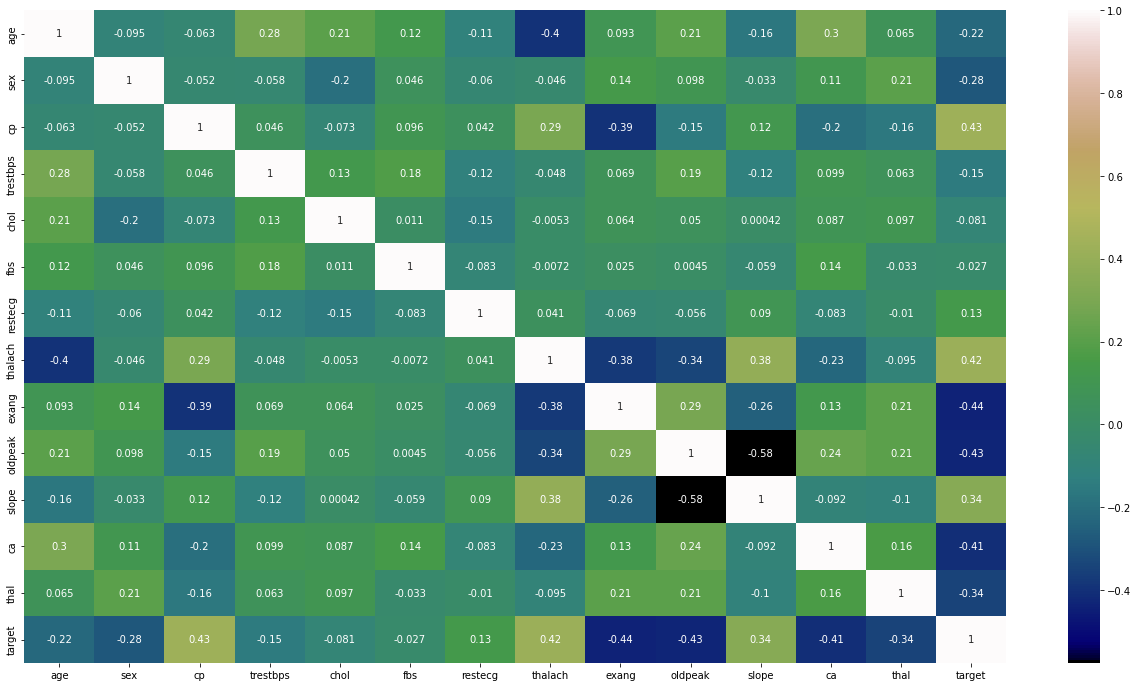

In [14]:
# The following heatmap shows the correlation among different attributes. 
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(), annot=True, cmap='gist_earth')
plt.show()

##### Based on the above heatmap, we can conclude that: 
##### 1. There is no strong correlation between any of the variables. 
##### 2. Comparatively, there are some correlation between 'target' and 'cp', between 'target' and 'thalach', and between 'target' and 'slope'.  
##### 3. Similarly, there is some correlation between 'thalach' and 'slope'
##### 4. There is comparatively higher negative correlation between 'slope' and 'oldpeak'. 

### 2.b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 


#### As there is no attribute with object data type, there is no categorical data.  

#### The countplots are drawn below between variables that have some correlation. 

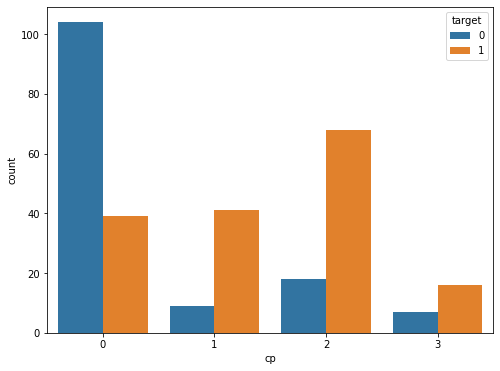

In [15]:
# Use count plot between cp and target
plt.figure(figsize=(8,6))
sns.countplot(data=df, x=df['cp'], hue=df['target'])
plt.show()

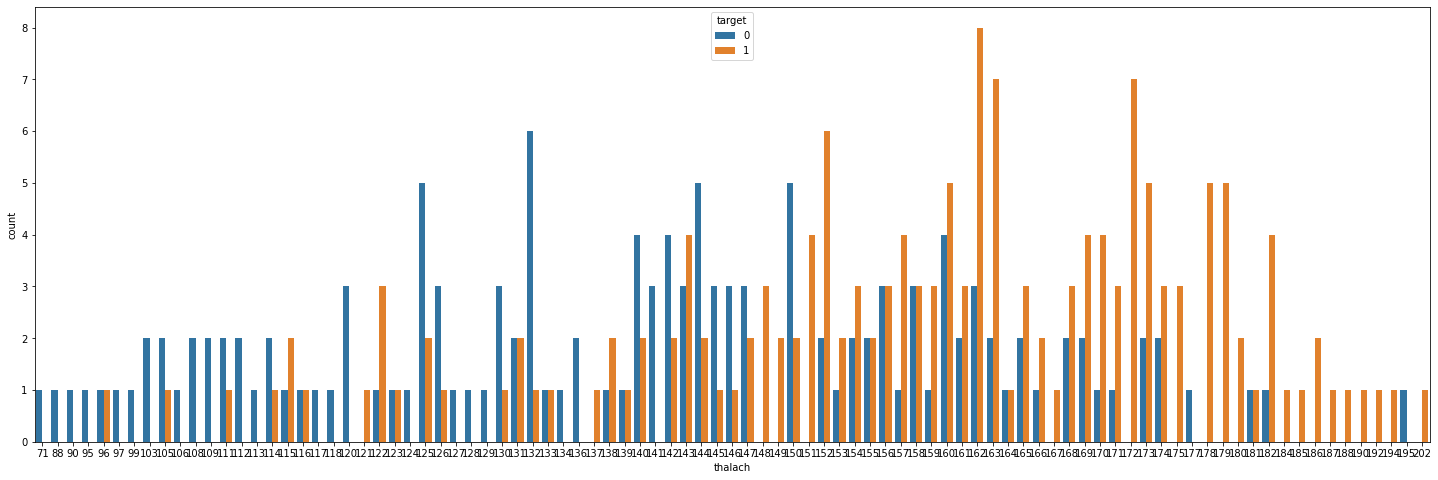

In [16]:
# Use count plot between thalach and target
plt.figure(figsize=(25,8))
sns.countplot(data=df, x=df['thalach'], hue=df['target'])
plt.show()

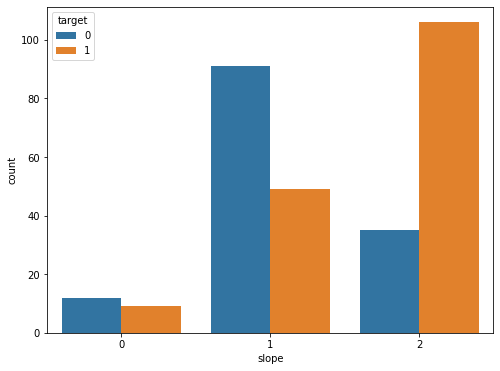

In [17]:
# Use count plot between slope and target
plt.figure(figsize=(8,6))
sns.countplot(data=df, x=df['slope'], hue=df['target'])
plt.show()

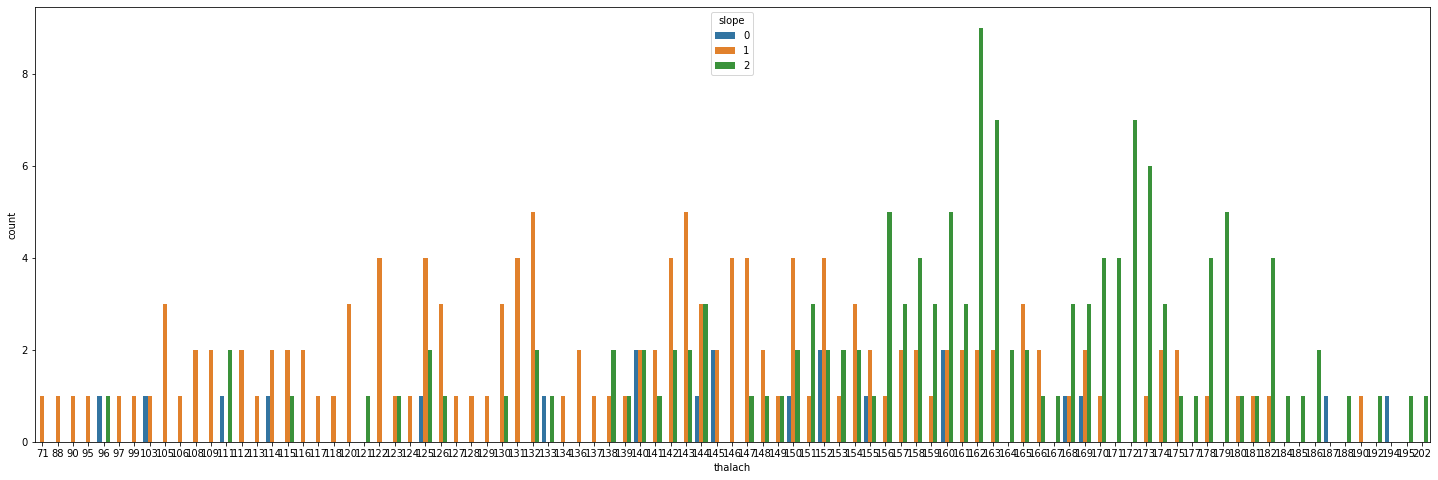

In [18]:
# Use count plot between slope and target
plt.figure(figsize=(25,8))
sns.countplot(data=df, x=df['thalach'], hue=df['slope'], orient='v')
plt.show()

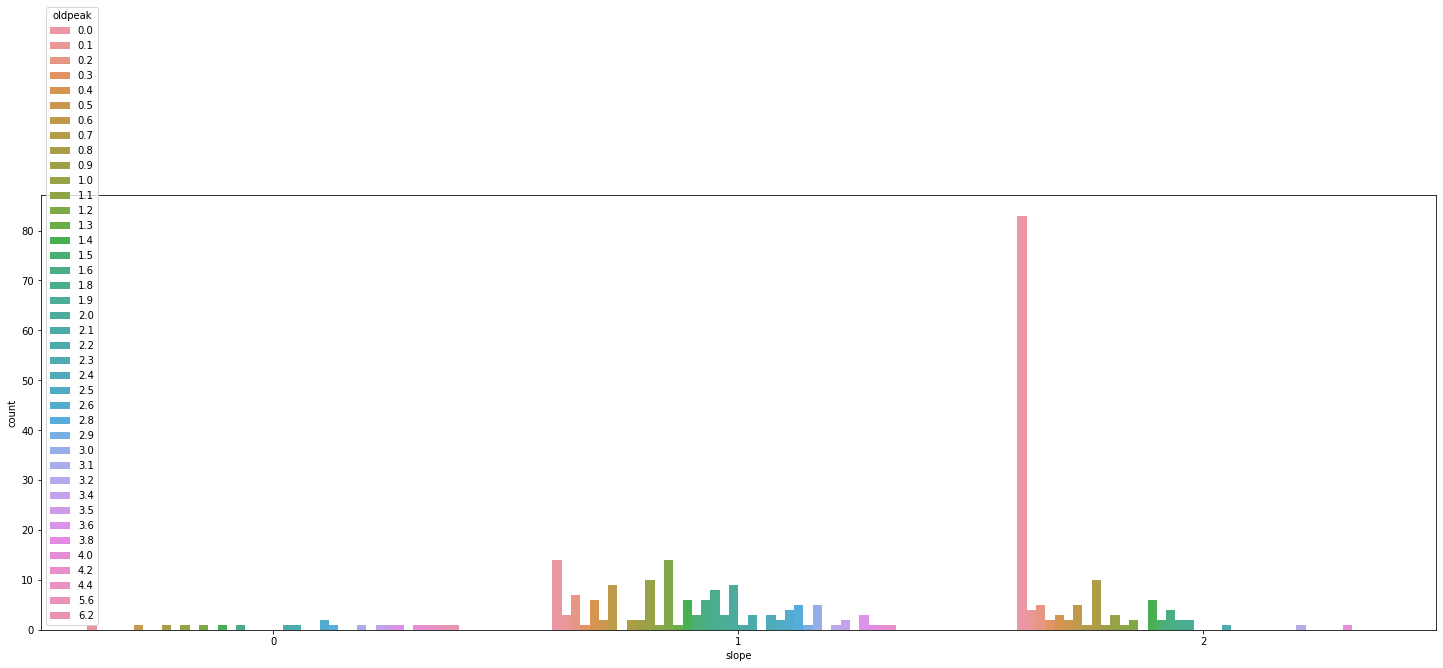

In [19]:
# Use count plot between slope and oldpeak
plt.figure(figsize=(25,8))
sns.countplot(data=df, x=df['slope'], hue=df['oldpeak'])
plt.show()

### 2.c.	Study the occurrence of CVD across the Age category

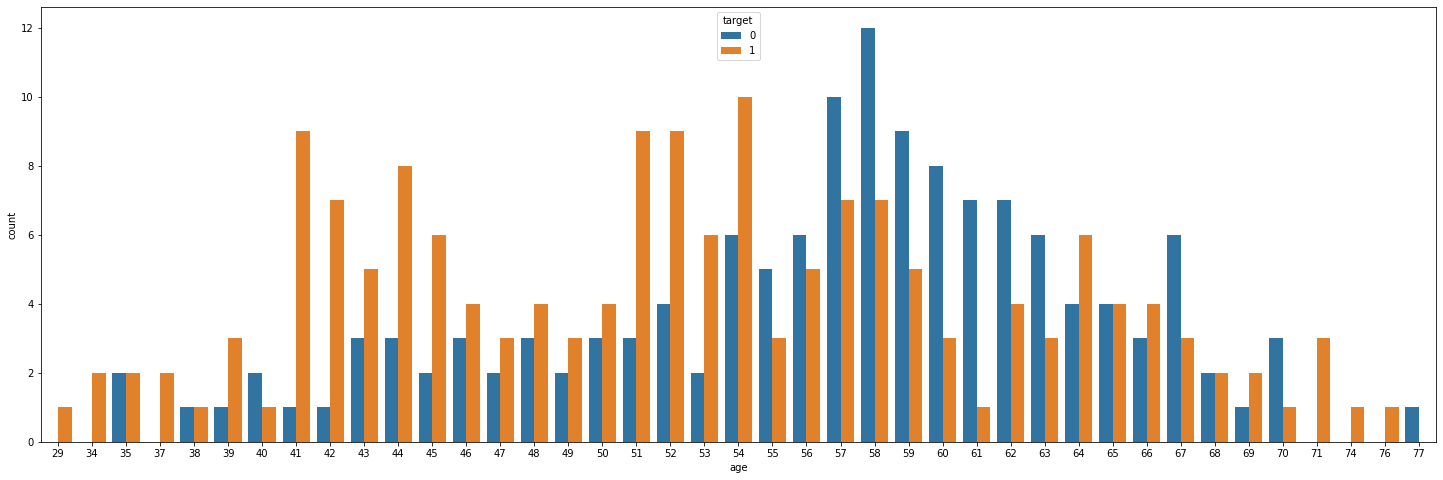

In [20]:
# Use count plot between age and target
plt.figure(figsize=(25,8))
sns.countplot(data=df, x=df['age'], hue=df['target'])
plt.show()

#### From the graph above, a conclusion can be drawn that Cardiovascular Disease (CVD) is higher among people between ages
#####    i. 41 and 45
#####   ii. 51 and 54
#####  iii. 57 and 58
####
####

#### 2.d.	Study the composition of all patients with respect to the Sex category

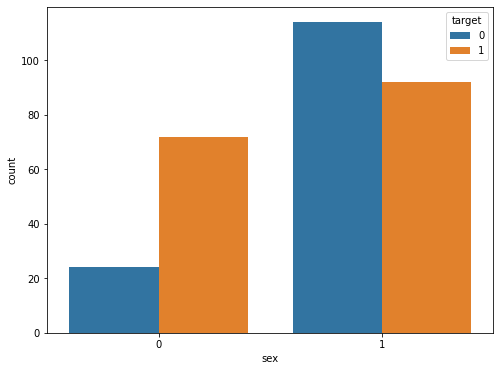

In [21]:
# Use count plot between sex and target
plt.figure(figsize=(8,6))
sns.countplot(data=df, x=df['sex'], hue=df['target'])
plt.show()

#### The above graph shows that females tend to have less Cardiovascular Disease than male population. 

### 2.e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trestbps', ylabel='Density'>

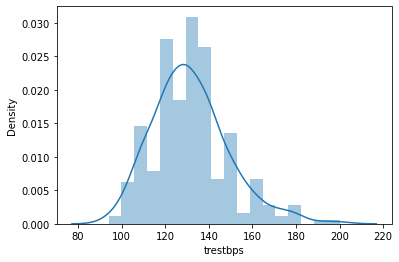

In [22]:
sns.distplot(df['trestbps'])

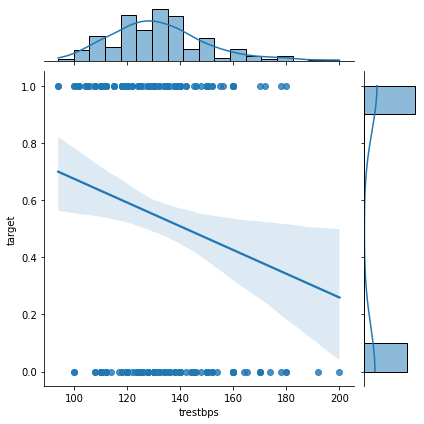

In [23]:
sns.jointplot(x=df['trestbps'], y=df['target'], kind='reg')

In [24]:
df_bps=df.loc[:, ['trestbps', 'target']]

In [25]:
# Here the sum is used to add only 1s to find who all are affected by resting blood pressure.  
df_bps.sort_values(by=['trestbps', 'target'])
df1_bps=df_bps.groupby('trestbps').sum()
df1_bps[df1_bps['target']>=10]

,target
trestbps,
120,23
130,23
140,17


#### The above graphs and the statistics show that people with the resting blood pressure between 120 and 140 tend to have higher chances to heart attack. 

### 2.f.	Describe the relationship between cholesterol levels and a target variable

In [26]:
df_chol=df.loc[:, ['chol', 'target']]

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

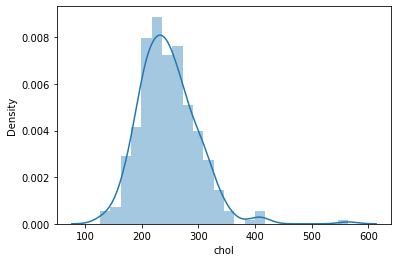

In [27]:
sns.distplot(df_chol['chol'])

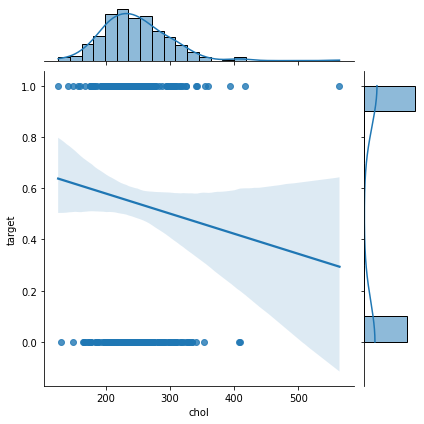

In [28]:
sns.jointplot(x=df_chol['chol'], y=df_chol['target'], kind='reg')

In [29]:
# Sum method is used to add 1s to count people who are affected by CVD
df_chol.sort_values(by=['chol', 'target'])
df1_chol=df_chol.groupby('chol').sum()

In [30]:
df1_chol[df1_chol['target']>=4]

,target
chol,
197,4
204,4
211,4
226,4
234,4
240,4


#### The above graphs and statistical results show that people with cholestrol level between 200 and 300 tend to have higher rate of heart attack.
####
### 2.g.	State what relationship exists between peak exercising and the occurrence of a heart attack


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

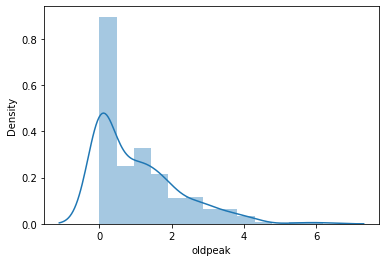

In [31]:
sns.distplot(df['oldpeak'], kde='True')

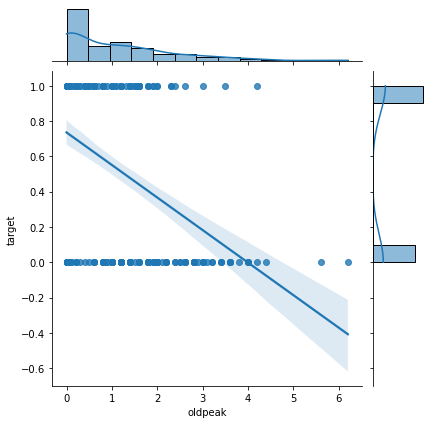

In [32]:
sns.jointplot(x=df['oldpeak'], y=df['target'], kind='reg')

In [33]:
df_oldpeak=df.loc[:, ['oldpeak', 'target']]
df_oldpeak.sort_values(by=['oldpeak', 'target'])
df1_oldpeak=df_oldpeak.groupby('oldpeak').sum()
df1_oldpeak[df1_oldpeak['target']>=4]

,target
oldpeak,
0.0,73
0.1,4
0.2,9
0.4,8
0.5,4
0.6,10
0.8,7
1.0,4
1.2,7


#### The above graphs and statistical results show that people with more rest level tend to have higher rate of heart attack.

In [34]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 2.h.	Check if thalassemia is a major cause of CVD

In [35]:
df_thal=df.loc[:, ['thal', 'target']]
df_thal.head(2)

,thal,target
0,1,1
1,2,1


In [36]:
# Grouping by 'thal' variable and summing the target (add 1s and ignore 0s) will provide types of thal attribute causing CVDs 
df1_thal1=df_thal.groupby('thal').sum()
df1_thal1

,target
thal,
0,1
1,6
2,129
3,28


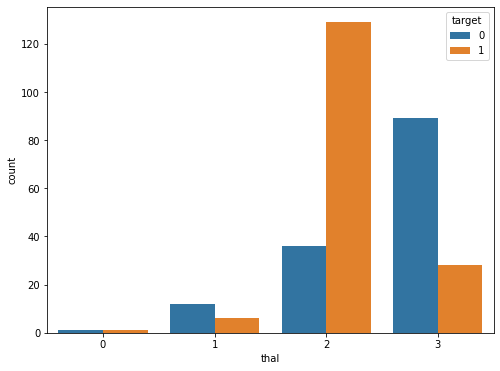

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_thal, x=df['thal'], hue=df['target'])
plt.show()

#### Grouping results and the graph shows that there is a strong relationship between people with thal attribute 2 with CVD cases. 

### 2.i.	List how the other factors determine the occurrence of CVD

In [38]:
df_others=df.loc[:, ['age', 'cp','trestbps', 'chol', 'thalach', 'oldpeak', 'ca','thal', 'target']]
df_others=df_others.where(df['target']>0)
df_others.head(2)

,age,cp,trestbps,chol,thalach,oldpeak,ca,thal,target
0,63.0,3.0,145.0,233.0,150.0,2.3,0.0,1.0,1.0
1,37.0,2.0,130.0,250.0,187.0,3.5,0.0,2.0,1.0


In [39]:
df_others.corr()['target'][:]

age        NaN
cp         NaN
trestbps   NaN
chol       NaN
thalach    NaN
oldpeak    NaN
ca         NaN
thal       NaN
target     NaN
Name: target, dtype: float64

### 2.j.	Use a pair plot to understand the relationship between all the given variables

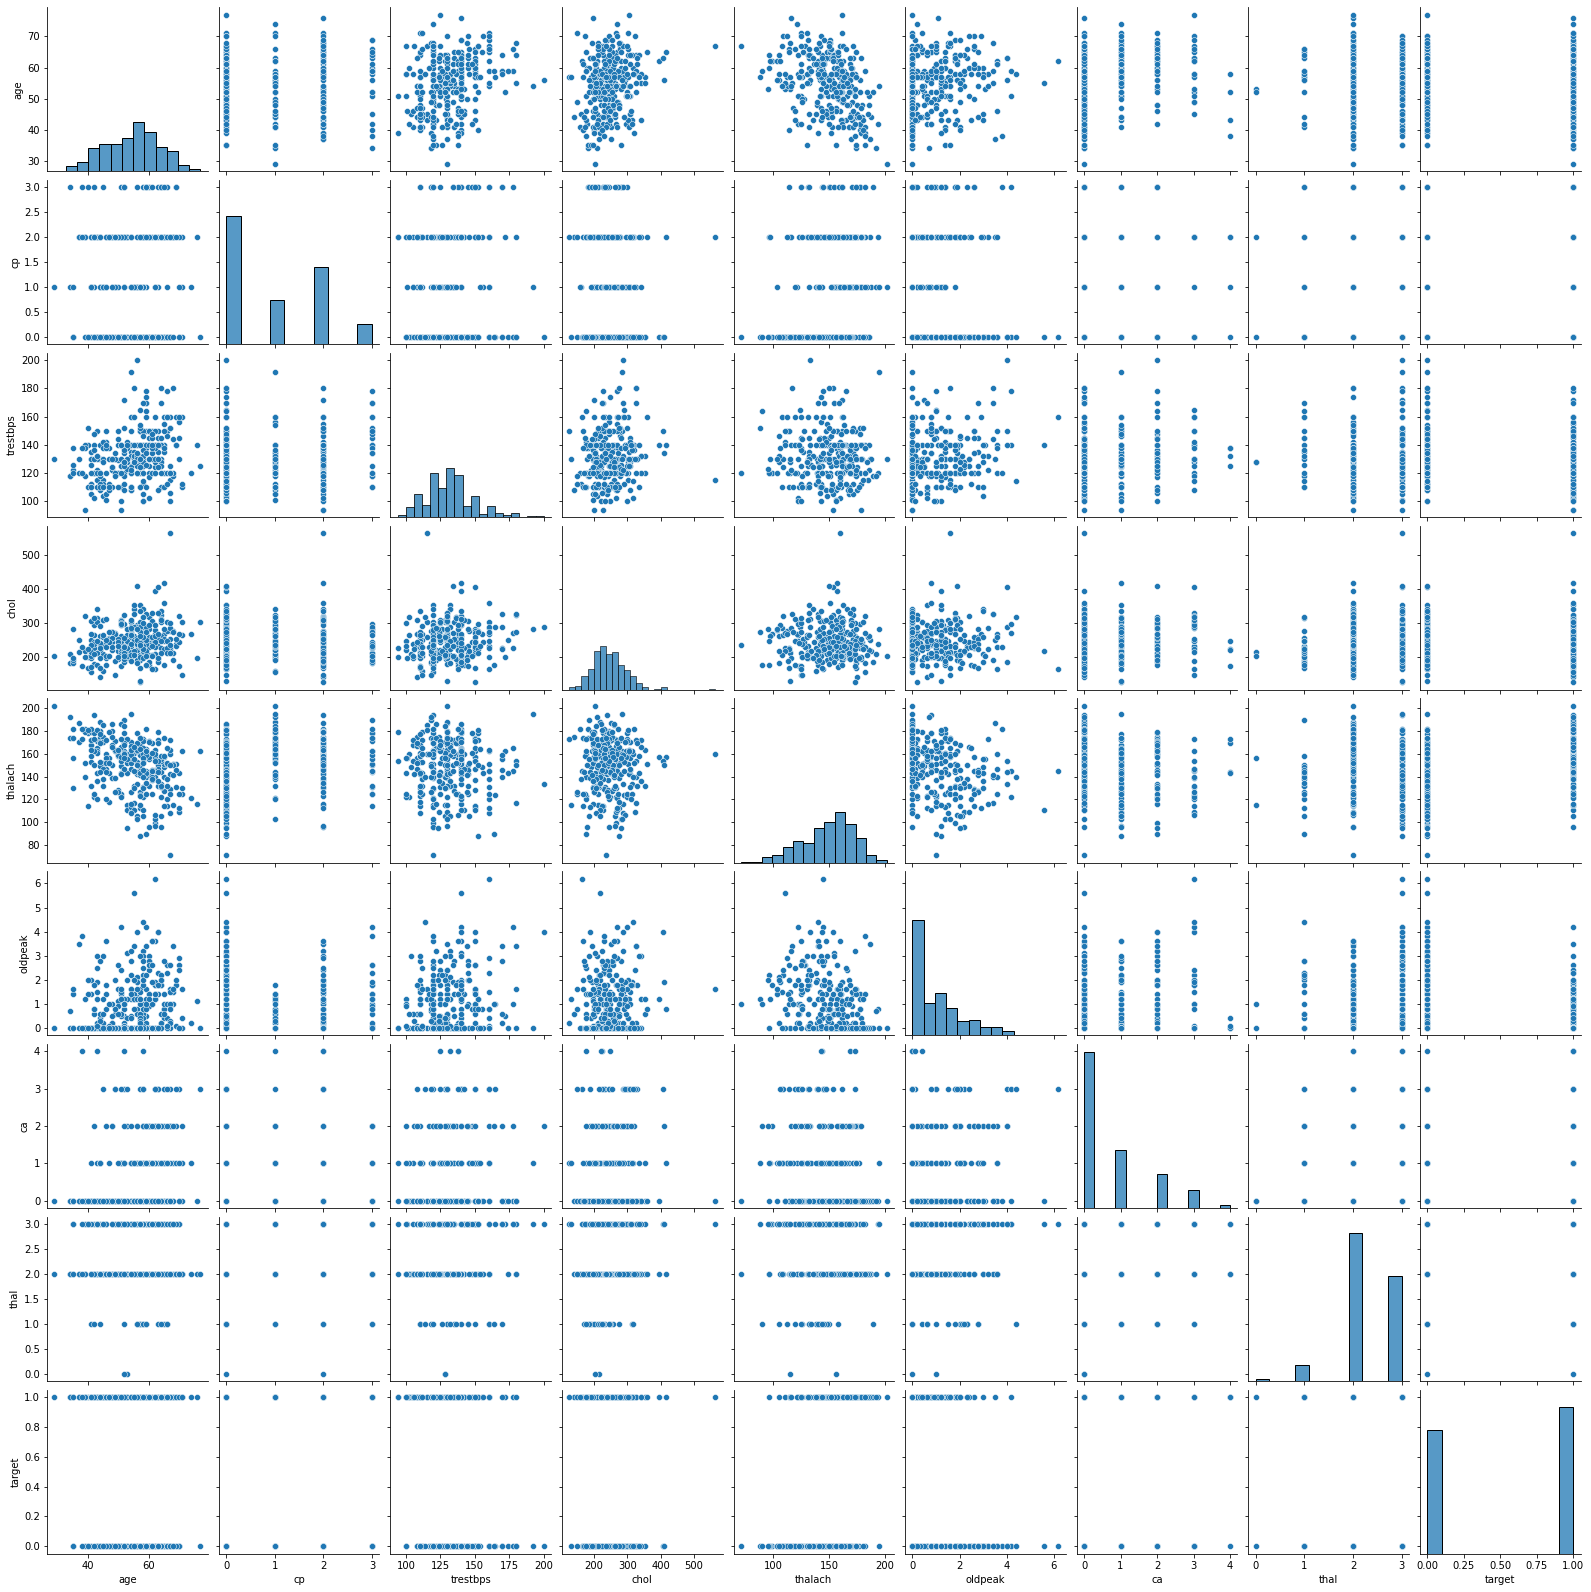

In [40]:

df1=df.loc[:, ['age', 'cp','trestbps', 'chol', 'thalach', 'oldpeak', 'ca','thal', 'target']]
sns.pairplot(df1)

## 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from stats models) for feature selection

In [41]:
from sklearn.model_selection import train_test_split
features = df.iloc[:, :-1]
label = df.loc[:, ['target']]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=1000)


In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [43]:
model.score(X_train, y_train)

0.8547717842323651

In [44]:
model.score(X_test, y_test)

0.8852459016393442

In [45]:
pred= model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred)

0.8852459016393442

In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [49]:
model.score(X_train, y_train)

0.8547717842323651

In [50]:
model.score(X_test, y_test)

0.8852459016393442

In [51]:
pred = rf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred)

0.8360655737704918

In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.89      0.77      0.83        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### The above two regression model results show that while both models have test score higher than the score on training data, the accuracy with Logistics Regression is higher. Therefore, in this case, Logistics Regression is recommended to predict CVD. 

In [69]:
df['oldpeak']=df['oldpeak'].astype('int64')

df = df.reindex()

features = df.loc[:, ['age', 'cp','trestbps', 'chol', 'thalach', 'oldpeak', 'ca','thal']]
label = df.loc[:, ['target']]



from sklearn.model_selection import cross_val_score

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

scores = cross_val_score(model,
                        features,
                        label,
                        cv = 5) #5 or 10

scores

array([0.81967213, 0.90163934, 0.8       , 0.86666667, 0.7       ])

In [62]:
features

,age,cp,trestbps,chol,thalach,oldpeak,ca,thal
0,63,3,145,233,150,2,0,1
1,37,2,130,250,187,3,0,2
2,41,1,130,204,172,1,0,2
3,56,1,120,236,178,0,0,2
4,57,0,120,354,163,0,0,2
...,...,...,...,...,...,...,...,...
298,57,0,140,241,123,0,0,3
299,45,3,110,264,132,1,0,3
300,68,0,144,193,141,3,2,3
301,57,0,130,131,115,1,1,3


In [63]:
label

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [64]:
# What is the minimum score threshold for this dataset?

print("Minimum Score Threshold is : ",scores.mean())

Minimum Score Threshold is :  0.8175956284153004


In [65]:
# What is the optimal score I can achieve for this dataset using LogisticRegression?
scores.max()

0.9016393442622951

In [66]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Step2: Initialize K-Fold Cross Validation function

from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, #Use the same CV values that was applied in cross_val_score
             shuffle=True,
             random_state = 1) # To ensure the data is not randomized at every iteration

# 3. initialize for loop to identify which sample gives the best score and which sample is the best 
#.   training sample

counter = 0



In [67]:
for train,test in kfold.split(features):
    
    #Counter will help you track the sample split
    counter += 1
    
    #Extract the training set and testing set
    X_train,X_test = features[train],features[test]
    y_train,y_test = label[train] , label[test]
    
    #Fit the model 
    model.fit(X_train,y_train)
    
    if model.score(X_test,y_test) >= 1.0:
        print("Test Score {} Train Score {} for Sample Split {}".format(
            model.score(X_test,y_test),model.score(X_train,y_train),counter))
   

KeyError: "None of [Int64Index([  1,   2,   3,   5,   6,   7,   8,   9,  10,  13,\n            ...\n            290, 291, 292, 293, 294, 296, 297, 298, 299, 300],\n           dtype='int64', length=241)] are in the [columns]"